# Part II - Factors that affect BorrowerRate
## by Sheriff Opeyemi Afolabi

## Investigation Overview


The main purpose of this investigation is to determine the factors that affect borrowers rate (that is BorrowerRate) and to understand the relationships between BorrowerRate and  other numerical variables using data visualizations. 


## Dataset Overview

My dataset contains 113,937 loans with 81 variables on eac loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will focus on 10 features or variables here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe
loanData = pd.read_csv('prosperLoanData.csv')

In [3]:
#Select variables of interest
features = ['EmploymentStatus', 'IsBorrowerHomeowner', 
            'Term', 'DebtToIncomeRatio', 
            'LoanStatus', 'LoanOriginalAmount',
            'LenderYield', 'ProsperRating (numeric)', 
            'BorrowerAPR', 'BorrowerRate']

loanData = loanData[features]

In [4]:
# Handling missing values

# function that replaces missing values with mean (for numerical variables)
def replace_wt_mean(df, features_list):
    for feature in features_list:
        df[feature] = df[feature].fillna(df[feature].mean())
    return df


# function that replaces missing values with a string (for categorical variables)
def replace_with_unknown(df, features_list):
    for feature in features_list:
        df[feature] = df[feature].fillna('Unknown')
    return df

In [5]:
# replacing the missing values with mean
cleaned_df = replace_wt_mean(loanData, ['ProsperRating (numeric)', 
                                          'DebtToIncomeRatio', 'BorrowerAPR'])
# replacing the missing values with a string 
cleaned_df = replace_with_unknown(loanData, ['EmploymentStatus'])


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of BorrowerRate

The histplot below shows that BorrowerRate is not normally distributed but randomly skewed as the there are lots of peaks. Then mean is seen to be around 0.19 while the peak is around 0.15. 

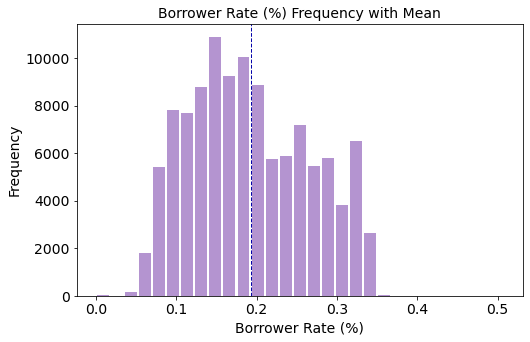

In [6]:
# calcluate bins, and use the hist function with styling and a mean line
bins = np.arange(0, cleaned_df['BorrowerRate'].max()+0.0175,0.0175)
default_color = sns.color_palette()[4]

x = cleaned_df['BorrowerRate']

plt.figure(figsize=[8,5])
plt.hist(x, bins=bins, alpha=0.7, rwidth=0.85, color=default_color)

# here is our mean line using axvline()
plt.axvline(x.mean(), color='#0504aa', linestyle='dashed', linewidth=1) 
plt.title('Borrower Rate (%) Frequency with Mean', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('Borrower Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

## Relationships between the Borrower Rate and other numeric variables

The correlation plot below shows a strong positive relationship between the following pairs of variables:

- BorrowerRate and BorrowerAPR: This means that increase in BorrowerRate will result to an increase in the BorrowerAPR and a decrease in BorrowerRate will bring about a decrease in BorrowerAPR.


- BorrowerRate and LenderYield: This means that increase in BorrowerRate will result to an increase in the LenderYield and a decrease in BorrowerRate will bring about a decrease in LenderYield.
 
- However, it can be seen that BorrowerRate has a strong negative relationship with ProsperRating (numeric): This means that the higher the ProsperRating (numeric), the lower the BorrowerRate.

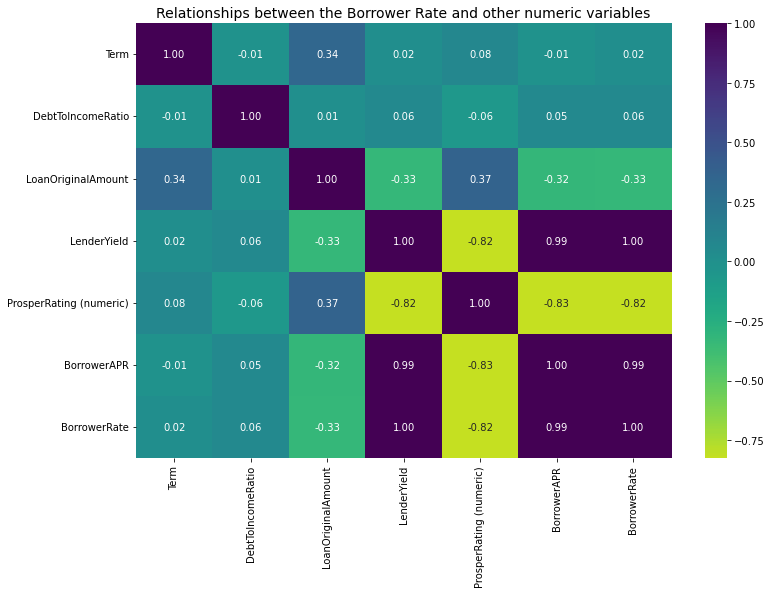

In [7]:
numerical_vars = ['Term', 'DebtToIncomeRatio',
                 'LoanOriginalAmount', 'LenderYield', 'ProsperRating (numeric)',
                 'BorrowerAPR', 'BorrowerRate']

# Correlation Plot

plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df[numerical_vars].corr(), annot = True, fmt='.2f', center=0, cmap='viridis_r');

plt.title("Relationships between the Borrower Rate and other numeric variables", fontsize=14);

## Relationship between BorrowerRate and IsBorrowerHomeowner

The boxplot below clearly shows that borrowers who are home owners enjoy lower BorrowerRate compared to those who are not home owners.

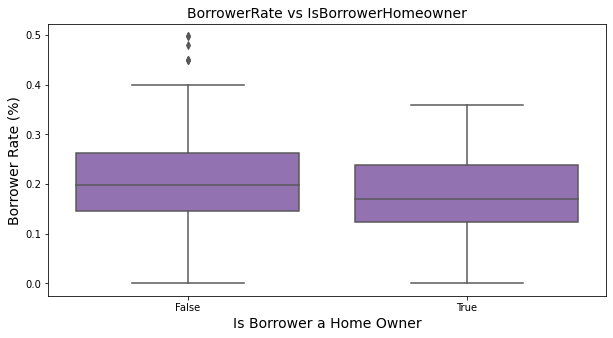

In [8]:
plt.figure(figsize=(10, 5))


sns.boxplot(x=cleaned_df.IsBorrowerHomeowner, y=cleaned_df.BorrowerRate, color=default_color);  

plt.title('BorrowerRate vs IsBorrowerHomeowner', fontsize=14);

plt.xlabel('Is Borrower a Home Owner', fontsize=14);
plt.ylabel('Borrower Rate (%)', fontsize=14);   

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Project_LoanData_Part_II_Explanatory.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 